# Churn & Retention Analysis (Megaline)

## **Project Overview**
The goal of this analysis is to measure **churn rate** and **retention rate** for Megaline’s Surf and Ultra plans.  
- **Churn Rate**: Percentage of users who stop using the service (no calls, messages, or data usage).  
- **Retention Rate**: Percentage of users who remain active during the observed period.  
- **Objective**: Compare churn and retention between Surf and Ultra plans to understand customer loyalty and lifetime value (LTV).


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="September97!",
    database="megaline_db"
)

In [3]:
# SQL Query for churn rate
churn_query = """
SELECT
    is_ultra,
    COUNT(DISTINCT user_id) AS total_users,
    SUM(CASE WHEN usage_flag = 0 THEN 1 ELSE 0 END) AS churned_users,
    ROUND(SUM(CASE WHEN usage_flag = 0 THEN 1 ELSE 0 END) / COUNT(DISTINCT user_id), 4) AS churn_rate
FROM (
    SELECT 
        user_id,
        is_ultra,
        CASE 
            WHEN SUM(calls) = 0 AND SUM(messages) = 0 AND SUM(mb_used) = 0 THEN 0
            ELSE 1
        END AS usage_flag
    FROM users_behavior
    GROUP BY user_id, is_ultra
) AS user_activity
GROUP BY is_ultra;
"""

churn_df = pd.read_sql(churn_query, conn)
display(churn_df)

/var/folders/p3/43px2jb159dgb_cp9t6gw27h0000gn/T/ipykernel_48682/4267901689.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  churn_df = pd.read_sql(churn_query, conn)


,is_ultra,total_users,churned_users,churn_rate
0,0,2229,0.0,0.0
1,1,985,0.0,0.0


In [4]:
# Add retention rate
churn_df['retention_rate'] = 1 - churn_df['churn_rate']
display(churn_df)

,is_ultra,total_users,churned_users,churn_rate,retention_rate
0,0,2229,0.0,0.0,1.0
1,1,985,0.0,0.0,1.0


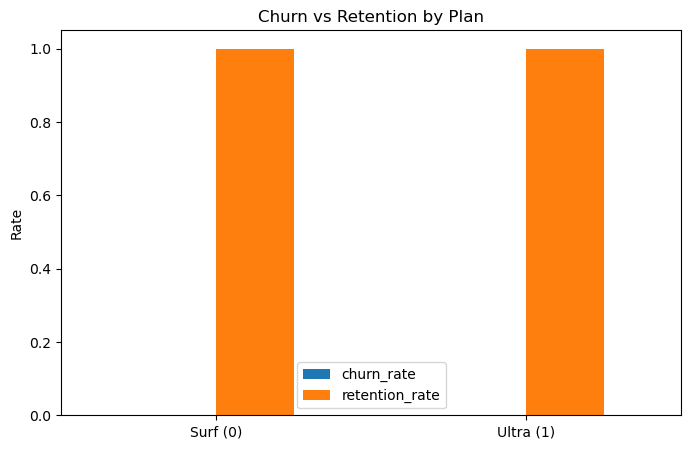

In [5]:
# Plot churn vs retention
churn_df[['churn_rate', 'retention_rate']].plot(
    kind='bar',
    figsize=(8,5),
    title='Churn vs Retention by Plan'
)
plt.xticks([0,1], ['Surf (0)', 'Ultra (1)'], rotation=0)
plt.ylabel('Rate')
plt.show()

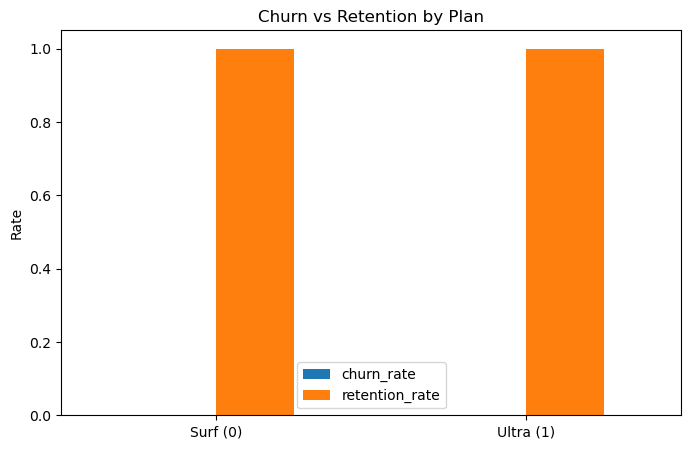

In [6]:
# Plot churn vs retention
churn_df[['churn_rate', 'retention_rate']].plot(
    kind='bar',
    figsize=(8,5),
    title='Churn vs Retention by Plan'
)
plt.xticks([0,1], ['Surf (0)', 'Ultra (1)'], rotation=0)
plt.ylabel('Rate')
plt.show()

In [7]:
# Insights generator for churn/retention
def churn_insights(df):
    surf = df[df['is_ultra'] == 0].iloc[0]
    ultra = df[df['is_ultra'] == 1].iloc[0]

    print("\n=== Churn & Retention Insights ===")
    print(f"Surf Plan: Churn = {surf['churn_rate']:.2%}, Retention = {surf['retention_rate']:.2%}")
    print(f"Ultra Plan: Churn = {ultra['churn_rate']:.2%}, Retention = {ultra['retention_rate']:.2%}")
    
    if ultra['churn_rate'] < surf['churn_rate']:
        print("Ultra plan retains customers better than Surf.")
    else:
        print("Surf plan retains customers better than Ultra.")
    
    print("Recommendation: Consider improving the plan with higher churn or offering retention incentives.")

churn_insights(churn_df)


=== Churn & Retention Insights ===
Surf Plan: Churn = 0.00%, Retention = 100.00%
Ultra Plan: Churn = 0.00%, Retention = 100.00%
Surf plan retains customers better than Ultra.
Recommendation: Consider improving the plan with higher churn or offering retention incentives.
